# Dr. X's Code

Dr. X says his function "gets sequences." I have (tried) documented his funciton more carefully below.

In [1]:
from Bio import SeqIO
from Bio import Seq
from Bio.Data import CodonTable
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Function `get_sequences_from_file(fasta_fn)`

**Description:** Takes as input a fasta file and stores the entries as Seq objects in a dictionary data object where the species names are the keys and the Seq objects are the values.  

**Parameters:**  
+  `fasta_fn`: fasta file to be opened as a string   

**Return:** a dictionary where keys are the species names and the values are the Seq objects  

**Example Usage:**  
```python
>>> get_sequences_from_file('/example/fasta/file.fasta')
```    
**Output:**  
```python
{'Example species1': Seq('ACGTACGTACGT', SingleLetterAlphabet()),
 'Example species2': Seq('TGCATGCA', SingleLetterAlphabet())}
```

In [2]:
def get_sequences_from_file(fasta_fn):
    """Description: Takes as input a fasta file and stores the entries as Seq objects in a dictionary data object where the species names are the keys and the Seq objects are the values.
    
    Parameters:
        fasta_fn : fasta file to be opened, as a string
        
    Return: a dictionary where keys are the species names and the values are the Seq objects
    
    Example of usage:
        >> get_sequences_from_file('/example/fasta/file.fasta')
        
        Output:
            {'Example species1': Seq('ACGTACGTACGT', SingleLetterAlphabet()),
             'Example species2': Seq('TGCATGCA', SingleLetterAlphabet())}
    """
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

### The output of Dr. X's function:

In [3]:
get_sequences_from_file("penguins_cytb.fasta")

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTA

# My Functions

## Function `translate_function(string_nucleotides)`

**Description:** Translates a given string of nucleotides to an amino acid sequence.    
**Parameters:**  
+ `string_nucleotides`: string of nucleotides to be translated  

**Return:** a string of amino acids  

**Example Usage:**  
```python
>>> example_nucleotides = "ATGTTTGGGAAACCCAGA"
>>> translate_function(example_nucleotides)
```    
**Output:**  
```python
'MFGKP'
```

In [4]:
def translate_function(string_nucleotides):
    """Description: Translates a given string of nucleotides to an amino acid sequence
    
    Parameters:
        string_nucleotides : string of nucleotides to be translated
        
    Return: a string of amino acids
    
    Example of usage:
        >> example_nucleotides = "ATGTTTGGGAAACCCAGA"
        >> translate_function(example_nucleotides)
        
        Ouput:
            'MFGKP'
    """
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    codon_p1 = 0
    codon_p2 = 1
    codon_p3 = 3
    aa_seq_string = ""
    for codon in string_nucleotides:
        codon = string_nucleotides[codon_p1:codon_p3]
        if any(codon in stopCodons for stopCodons in mito_table.stop_codons): #checks if the current codon is a stop codon
            return (aa_seq_string) #returns the current amino acid sequence if a stop codon is encountered
        elif codon_p1 == 0 and any(codon in startCodons for startCodons in mito_table.start_codons)==False: #checks if the current codon is the first codon and that the first codon is an actual start codon
            return (print("The first codon is not a start codon!"))
        else:
            current_aa = mito_table.forward_table[codon] #retrieves the amino acid translation of the current codon
            aa_seq_string += current_aa
            codon_p1 += 3
            codon_p2 += 3
            codon_p3 += 3
    return(aa_seq_string)

## Function `alt_translate_function(string_nucleotides)`

**Description:** Translates a given string of nucleotides to an amino acid sequence.    
**Parameters:**
+  `string_nucleotides`: string of nucleotides to be translated
  
**Return:** a string of amino acids
  
**Example Usage:**  
```python
>>> example_nucleotides = "ATGTTTGGGAAACCCAGA"
>>> translate_function(example_nucleotides)
```    
**Output:**  
```python
'MFGKP'
```

In [5]:
def alt_translate_funciton(string_nucleotides):
    """Description: Translates a given string of nucleotides to an amino acid sequence
    
    Parameters:
        string_nucleotides : string of nucleotides to be translated
        
    Return: a string of amino acids
    
    Example of usage:
        >> example_nucleotides = "ATGTTTGGGAAACCCAGA"
        >> alt_translate_function(example_nucleotides)
        
        Ouput:
            'MFGKP'
    """
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    
    #Uses the _translate_str() function from the Seq package to translate the given string.
    aa_seq_string = Seq._translate_str(string_nucleotides, table=mito_table, stop_symbol='', to_stop=True,cds=True,)
    return (aa_seq_string)

## Function `compute_molecular_weight(aa_seq)`

**Description:** calculates the molecular weight of a given amino acid sequence in Daltons.    
**Parameters:**
+  `aa_seq` : string of amino acids to be measured
  
**Return:** weight in Daltons of provided amino acid sequence as a floating point number
  
**Example Usage:**  
```python
>>> example_amino_acid_string = "MFGKP"
>>> compute_molecular_weight(example_amino_acid_string)
```    
**Output:**  
```python
578.7239
```

In [6]:
def compute_molecular_weight(aa_seq):
    """Description: calculates the molecular weight of a given amino acid sequence in Daltons.
    
    Parameters:
        aa_seq : string of amino acids to be measured
        
    Return: weight in Daltons of provided amino acid sequence as a floating point number
    
    Example of usage:
        >> example_amino_acid_string = "MFGKP"
        >> compute_molecular_weight(example_amino_acid_string)
        
        Ouput:
            578.7239
    """
    return (ProteinAnalysis(aa_seq).molecular_weight())

## Function `gc_content(string_nucleotides)`

**Description:** calculates the GC content of a given nucleotide sequence percent.    
**Parameters:**
+  `string_nucleotides` : string of nucleotides to be measured
  
**Return:** percent GC of provided nucleotide sequence as a floating point number
  
**Example Usage:**  
```python
>>> example_nucleotide_string = "ATGTTTGGGAAACCCAGA"
>>> gc_content(example_nucleotide_string)
```    
**Output:**  
```python
44.44444444444444
```

In [7]:
from Bio import SeqUtils
def gc_content(string_nucleotides):
    """Description: calculates the GC content of a given nucleotide sequence percent.
    
    Parameters:
        string_nucleotides : string of nucleotides to be measured
        
    Return: percent GC of provided nucleotide sequence as a floating point number
    
    Example of usage:
        >> example_nucleotide_string = "ATGTTTGGGAAACCCAGA"
        >> gc_content(example_nucleotide_string)
        
        Ouput:
            44.44444444444444
    """
    return (SeqUtils.GC(string_nucleotides))

# Main Script

In [88]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
penguins_df = pd.read_csv("penguins_mass.csv")
species_list = list(penguins_df.species)

Make a copy of `penguins_df` called `penguins_NC_df` so as not to alter the original dataframe.

In [89]:
penguins_NC_df = penguins_df.copy()
penguins_NC_df

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


Add columns `molecular_weight` and `GC_content` to `penguins_NC_df`

In [90]:
penguins_NC_df['molecular_weight'] = 'NaN'
penguins_NC_df['GC_content'] = 'NaN'

For every value of every key in the `cytb_seqs` dictionary, calculate the amino acid translation and GC content of the sequence and the molecular weight of the translated amino acid sequence. Update the appropriate cells of the `penguins_NC_df` dataframe.

In [94]:
for key, value in cytb_seqs.items():
    aa_seq = alt_translate_funciton(str(value)) #translate the nucleotide sequence to an amino acid sequence
    molWeight = compute_molecular_weight(aa_seq) #calculate molecular weight of amino acid sequence
    gcContent = gc_content(value) #calculate GC content of nucleotide squence
    penguins_NC_df.loc[penguins_NC_df.species == key,'molecular_weight'] = molWeight #update molecular_weight value of current species
    penguins_NC_df.loc[penguins_NC_df.species == key,'GC_content'] = gcContent #update GC_content value of current species

In [107]:
penguins_NC_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6,48.3815
1,Aptenodytes patagonicus,13.40,42563.7,49.6938
2,Eudyptes chrysocome,2.80,42475.6,51.1811
3,Eudyptes chrysolophus,4.50,42445.5,50.9186
4,Eudyptes sclateri,4.25,42475.6,50.8311
5,Eudyptula minor,1.60,42491.6,49.2563
6,Pygoscelis adeliae,4.60,42458.6,49.0814
7,Pygoscelis antarctica,4.10,42404.5,47.769
8,Pygoscelis papua,6.10,42595.9,47.1566
9,Spheniscus demersus,3.20,42431.5,48.294


## Some graphs of things

**A bar graph showing the mass of each species:**

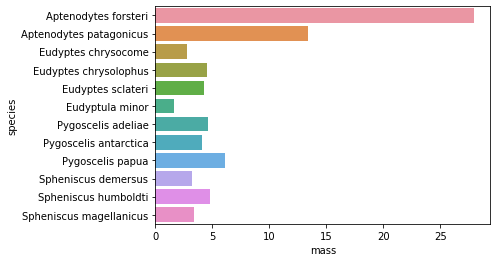

In [106]:
sns.barplot(x = "mass", y = "species", data = penguins_NC_df)

1. What is the smallest penguin species?  
  + *Eudyptula minor*
2. What else is interesting about this species?  
  + Not sure what you're looking for here...

**A scatter plot of GC content v.s. molecular weight**

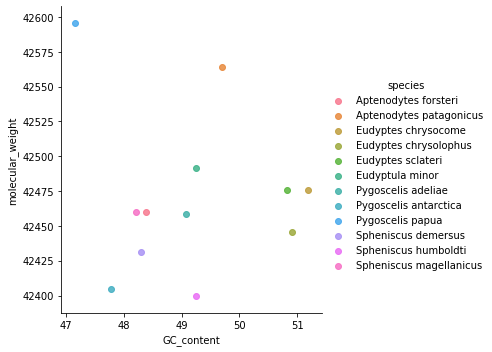

In [110]:
sns.lmplot(x = "GC_content", y = "molecular_weight", hue = "species", data = penguins_NC_df, fit_reg = False)

**Writing the new `penguins_NC_df` dataframe to a new `.csv` file.**

In [112]:
penguins_NC_df.to_csv("penguins_mass_cytb.csv",index=False)